In [14]:
#Importing all the libraries jo zruri hain
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk


In [15]:
data = pd.read_csv("spam.csv", encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
## yaha srf 2 columns kaam k hain baqi me hataduga take data clean hojae
data = data[['v1', 'v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
## ab mein isko rename krduga jisse mje easy hojae 
data.columns = ['Label' , 'Message']
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\Shahjee\AppData\Local\Temp\ipykernel_9892\3947287007.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["Label"], palette= cols)


Text(0, 0.5, 'Number of Data points')

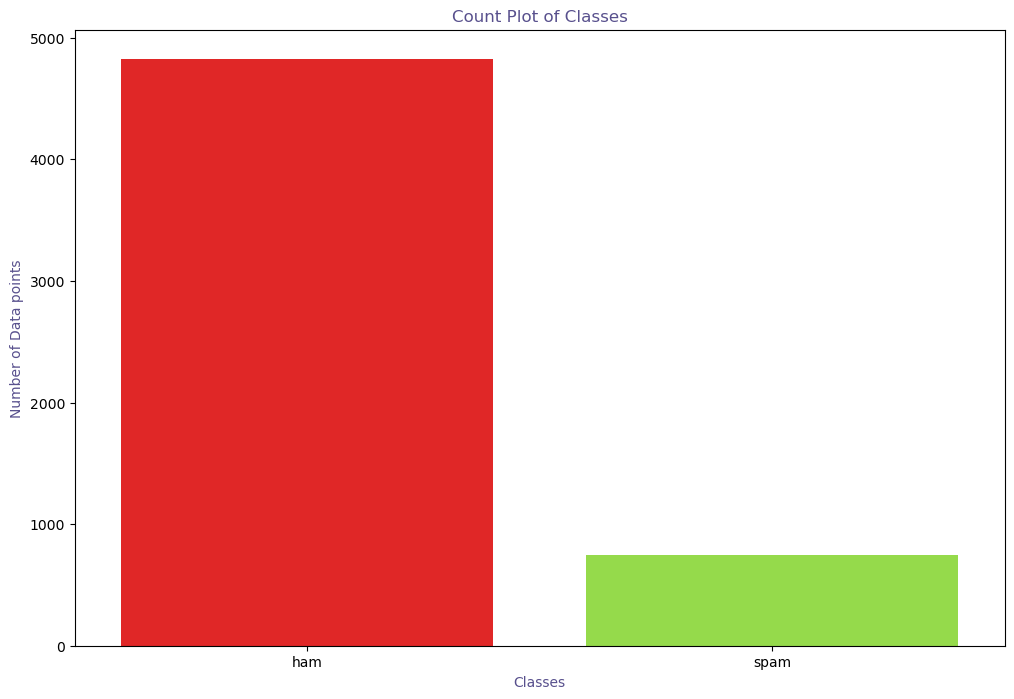

In [5]:
##ye library import krdi jisse k me graph dikhasku k kitna spam or kitna ham hai
import matplotlib.pyplot as plt
import seaborn as sns

##spam or ham ko color dedea or graph ka x,y axis bana k usme labeling mention ki hai jisse me visualize data dikhau
cols= ["#FF0808", "#96F233"]
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["Label"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [18]:
## actual numbers of messages
data.shape[0]

5572

In [19]:
# ye cleaning se phle ka data hai jisme me messages show krwarha hu 
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*data["Message"][:5], sep = "\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [20]:
#mene yaha par text ko cleankara h lowercase meme convert krdea ha or alphanumeric characters ko hatadea
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text)
    sms = sms.lower()
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

data["Clean_Text"] = data["Message"].apply(Clean)
#Lets have a look at a sample of texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning: \033[0m",*data["Clean_Text"][:5], sep = "\n")

 The First 5 Texts after cleaning: 
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


In [21]:
# ye mene tokenize kardea hai aik aik message wise
data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("\033[1m\u001b[45;1m The First 5 Texts after Tokenization: \033[0m",*data["Tokenize_Text"][:5], sep = "\n")

 The First 5 Texts after Tokenization: 
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


In [22]:
# ye mene stopwords remove krne k lie function banaya
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [23]:
## yaha lemmetization lagadi matlb meaningful data k lie
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas

data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemmatization:\033[0m", *data["Lemmatized_Text"][:5], sep="\n")

 The First 5 Texts after lemmatization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


In [26]:
#data cleaned hgya hai let see after these preprocessing techniques
data.head()

,Label,Message,Clean_Text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]"


In [35]:
# 1. Imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# 2. Corpus banaye from lemmatized text
corpus = [' '.join(words) for words in data["Lemmatized_Text"]]

# 3. Convert text into numbers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

# 4. Target column (make sure it's the right one)
y = data["Label"]   # OR data["Label"] — check your column name

# 5. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Cross-validation
cv_score = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=10)

# 8. Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

# 9. Results
print("\033[1m\u001b[44m Naive Bayes Results \033[0m")
print(f"Cross-Validation Accuracy: {cv_score.mean():.4f}")
print(f"Test Accuracy           : {accuracy:.4f}")
print("Macro F1 Score:", f1_macro)


 Naive Bayes Results 
Cross-Validation Accuracy: 0.9789
Test Accuracy           : 0.9722
Macro F1 Score: 0.9420836482023562


In [38]:
from sklearn.metrics import accuracy_score, f1_score

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Train set scores
train_accuracy = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred, average='macro')

# Test set scores
test_accuracy = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred, average='macro')

# Print all
print("\033[1m\u001b[44m Train & Test Set Evaluation \033[0m")
print(f"Train Accuracy : {train_accuracy:.4f}")
print(f"Train F1 Score : {train_f1:.4f}")
print(f"Test Accuracy  : {test_accuracy:.4f}")
print(f"Test F1 Score  : {test_f1:.4f}")


 Train & Test Set Evaluation 
Train Accuracy : 0.9928
Train F1 Score : 0.9845
Test Accuracy  : 0.9722
Test F1 Score  : 0.9421
